In [223]:
pip install statsmodels, matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'statsmodels,'


In [224]:
import pandas as pd # import pandas library to work with DataFrames
import numpy as np # import numpy library to work with numerical python funcitons such as sqrt and mean
import statsmodels.api as sm # import statsmodels.api library to work with time series

import warnings 
warnings.filterwarnings("ignore") # We would like to ignore warnings for now

import matplotlib.pyplot as plt # import matplotlib.pyplot library to plot figures
plt.style.use('fivethirtyeight')
#plt.style.use('Solarize_Light2') # you can use this style if you like!

In [225]:
demand_data = pd.read_csv(r'C:\Users\Praneeth\Downloads\CS5-train (2).csv', header=0, index_col=0,parse_dates=True)

# header=0 tells python that in the csv file, the first row is the header. Remember that Python always counts from 0.
# index_col=0 tells python that in the csv file, the first column is the index column. 
# We need to set the index column to be be able to work with time series
# parse_dates = True tells Python to read the index column using a date format

In [226]:
demand_data

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [227]:
import seaborn as sns

In [228]:
demand_data[demand_data.store_nbr == 22].head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
462,2013-01-01,22,AUTOMOTIVE,0.0,0
463,2013-01-01,22,BABY CARE,0.0,0
464,2013-01-01,22,BEAUTY,0.0,0
465,2013-01-01,22,BEVERAGES,0.0,0
466,2013-01-01,22,BOOKS,0.0,0


In [229]:
demand_data[demand_data.store_nbr == 22].tail(10)

,date,store_nbr,family,sales,onpromotion
id,,,,,
2999591,2017-08-15,22,MAGAZINES,4.00000,0
2999592,2017-08-15,22,MEATS,141.74900,0
2999593,2017-08-15,22,PERSONAL CARE,112.00000,6
2999594,2017-08-15,22,PET SUPPLIES,0.00000,0
2999595,2017-08-15,22,PLAYERS AND ELECTRONICS,4.00000,0
2999596,2017-08-15,22,POULTRY,131.07399,0
2999597,2017-08-15,22,PREPARED FOODS,31.00000,0
2999598,2017-08-15,22,PRODUCE,634.96500,98
2999599,2017-08-15,22,SCHOOL AND OFFICE SUPPLIES,8.00000,4


In [230]:
demand_data[demand_data.store_nbr == 22].describe()

,store_nbr,sales,onpromotion
count,55572.0,55572.000000,55572.000000
mean,22.0,73.601845,1.791244
std,0.0,316.225353,8.438331
min,22.0,0.000000,0.000000
25%,22.0,0.000000,0.000000
50%,22.0,0.000000,0.000000
75%,22.0,4.000000,0.000000
max,22.0,8909.000000,130.000000


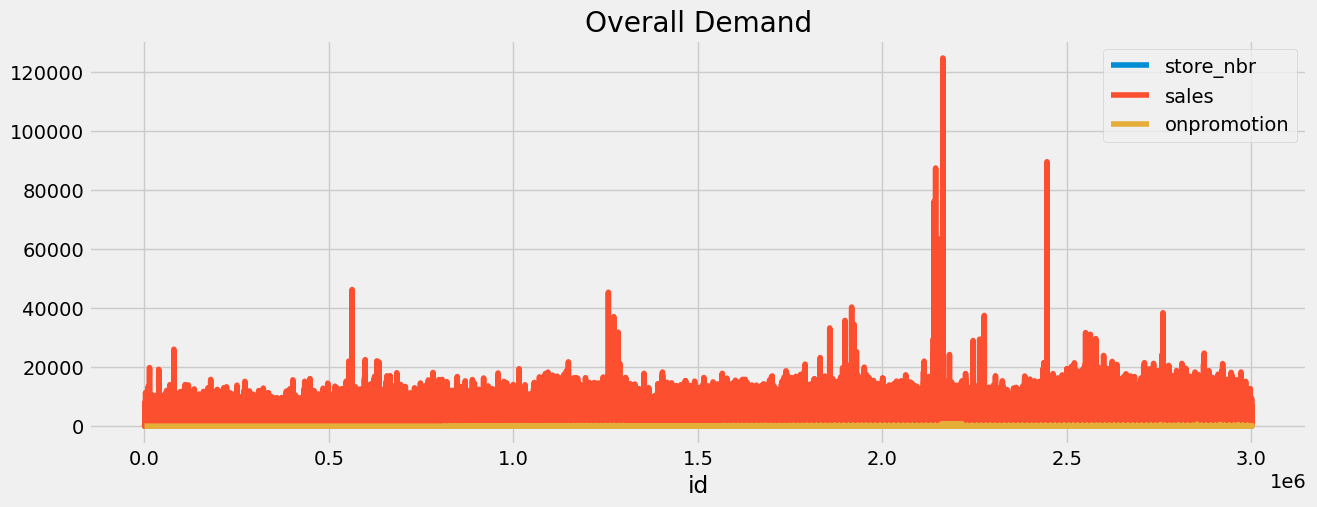

In [231]:
demand_data.plot(figsize=(14,5))
#plt.ylim(top=2000)
#plt.ylim(bottom=0)
#plt.gcf().subplots_adjust(bottom=0.15)
plt.title('Overall Demand')
plt.savefig("timeseries_plot1.pdf", dpi=600) # this saves the figure as a pdf file
plt.show()

In [232]:
demand_data[demand_data.store_nbr == 22].info()

<class 'pandas.core.frame.DataFrame'>
Index: 55572 entries, 462 to 2999600
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         55572 non-null  object 
 1   store_nbr    55572 non-null  int64  
 2   family       55572 non-null  object 
 3   sales        55572 non-null  float64
 4   onpromotion  55572 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.5+ MB


In [233]:
demand_data=demand_data[demand_data['store_nbr']==22]

In [234]:
demand_data.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
462,2013-01-01,22,AUTOMOTIVE,0.0,0
463,2013-01-01,22,BABY CARE,0.0,0
464,2013-01-01,22,BEAUTY,0.0,0
465,2013-01-01,22,BEVERAGES,0.0,0
466,2013-01-01,22,BOOKS,0.0,0


In [235]:
demand_data['family'].nunique()

33

In [236]:
demand_data.groupby('family')['sales'].mean()

family
AUTOMOTIVE                      2.183492
BABY CARE                       0.116390
BEAUTY                          0.623515
BEVERAGES                     509.435273
BOOKS                           0.000000
BREAD/BAKERY                   53.785629
CELEBRATION                     3.608076
CLEANING                      247.299881
DAIRY                         120.821259
DELI                           64.901425
EGGS                           21.008314
FROZEN FOODS                   29.505787
GROCERY I                     932.459803
GROCERY II                      2.328979
HARDWARE                        0.414489
HOME AND KITCHEN I             15.976247
HOME AND KITCHEN II             7.595012
HOME APPLIANCES                 0.135392
HOME CARE                      62.921021
LADIESWEAR                      0.207838
LAWN AND GARDEN                 0.007126
LINGERIE                        2.839074
LIQUOR,WINE,BEER               13.697150
MAGAZINES                       1.137173
MEATS    

In [237]:
demand_data =demand_data[demand_data['family']=='GROCERY I']

In [238]:
demand_data.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
474,2013-01-01,22,GROCERY I,0.0,0
2256,2013-01-02,22,GROCERY I,0.0,0
4038,2013-01-03,22,GROCERY I,0.0,0
5820,2013-01-04,22,GROCERY I,0.0,0
7602,2013-01-05,22,GROCERY I,0.0,0


In [239]:
demand_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1684 entries, 474 to 2999580
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1684 non-null   object 
 1   store_nbr    1684 non-null   int64  
 2   family       1684 non-null   object 
 3   sales        1684 non-null   float64
 4   onpromotion  1684 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 78.9+ KB


In [240]:
demand_data.date = pd.to_datetime(demand_data.date)

In [241]:
import pandas as pd

# Assuming you have a larger DataFrame named 'original_dataframe'
# Subsetting 'date' and 'sales' columns
demand_data = demand_data[['date', 'sales']]

# Converting the 'date' column to datetime
demand_data['date'] = pd.to_datetime(demand_data['date'])

# Setting 'date' as the index with a specified frequency (e.g., 'D' for daily)
demand_data.set_index('date', inplace=True)
# df.index.freq = 'D'  # 'D' stands for daily frequency

# You can replace 'D' with the appropriate frequency code if your data has a different frequency (e.g., 'M' for monthly).

# Now you have explicitly set the frequency for the datetime index.
# You can perform your time series analysis with the known frequency.


In [242]:
demand_data.head()

,sales
date,
2013-01-01,0.0
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,0.0


In [243]:
demand_data = demand_data.resample('D').asfreq()

demand_data.index.freq = 'D'


In [244]:
null_indexes = demand_data[demand_data['sales'].isnull()].index
print(null_indexes)




DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', name='date', freq=None)


In [245]:
demand_data.head(100)

,sales
date,
2013-01-01,0.0
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,0.0
...,...
2013-04-06,0.0
2013-04-07,0.0
2013-04-08,0.0


In [246]:
dates_to_update = pd.DatetimeIndex(['2017-08-15'])
demand_data.loc[dates_to_update, 'sales'] = 1


In [247]:
demand_data.head()

,sales
date,
2013-01-01,0.0
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,0.0


In [248]:
demand_data=demand_data.copy()

In [249]:
# Assuming df is your original DataFrame
demand_data = demand_data.loc['2017-01-31':'2017-08-15']


In [250]:
demand_data['sales'] = demand_data['sales'].replace(0, 1)
demand_data = demand_data.loc['2017-01-31':'2017-08-31']

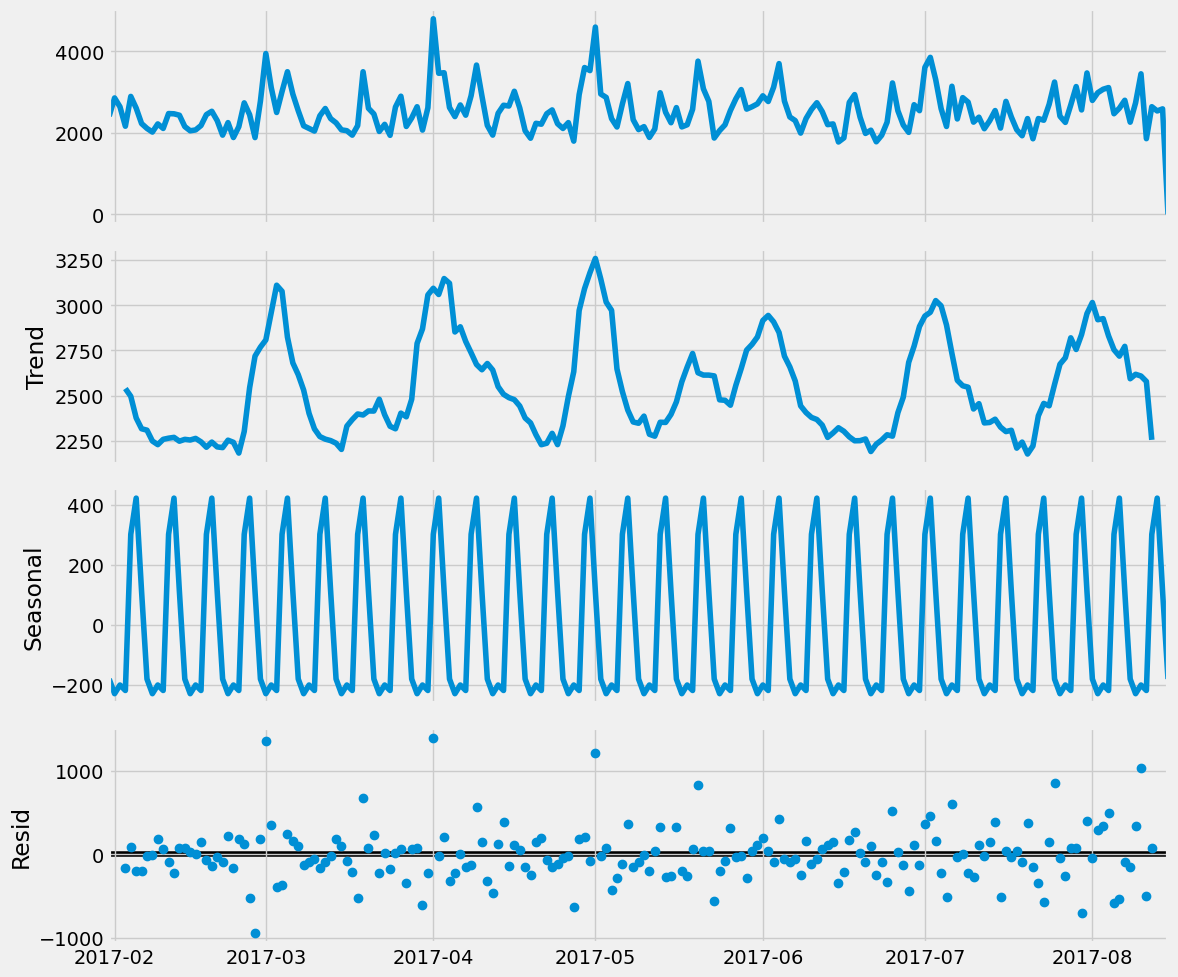

In [251]:
from statsmodels.tsa.seasonal import seasonal_decompose # this line imports the seasonal_decompose class from the statsmodels.tsa.seasonal library

result = seasonal_decompose(demand_data, model='additive')
#result = seasonal_decompose(demand_data, model='multiplicative')

from pylab import rcParams # these two lines adjust the size of the decomposed plots
rcParams['figure.figsize'] = 12, 10

result.plot() # this generates the plot of result

#plt.savefig("demand_decomposed.pdf", dpi=600)
plt.show() # this shows the plot

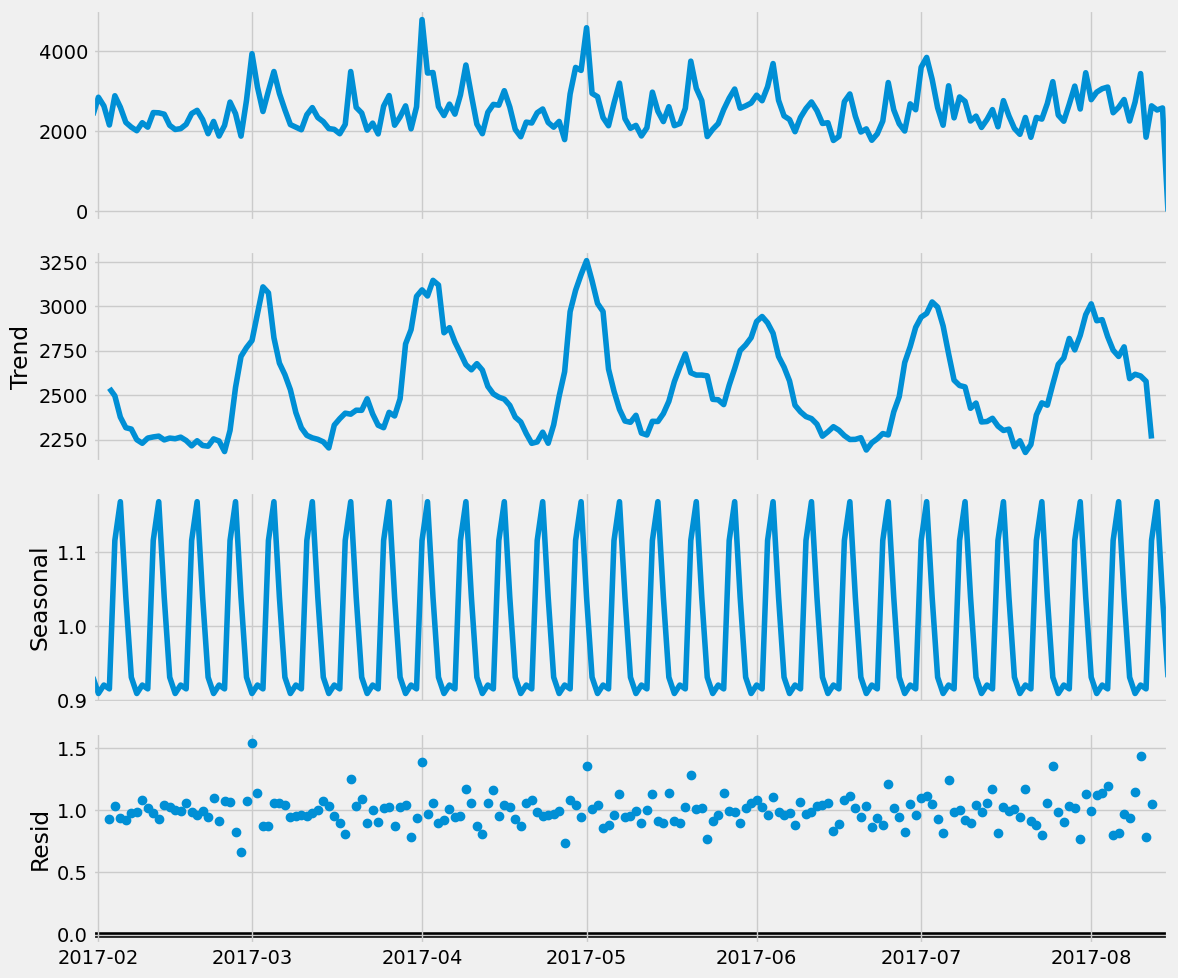

In [252]:
from statsmodels.tsa.seasonal import seasonal_decompose # this line imports the seasonal_decompose class from the statsmodels.tsa.seasonal library

#result = seasonal_decompose(demand_data, model='additive')
result = seasonal_decompose(demand_data, model='multiplicative')

from pylab import rcParams # these two lines adjust the size of the decomposed plots
rcParams['figure.figsize'] = 12, 10

result.plot() # this generates the plot of result

#plt.savefig("demand_decomposed.pdf", dpi=600)
plt.show() # this shows the plot

In [253]:
print(demand_data.columns)


Index(['sales'], dtype='object')


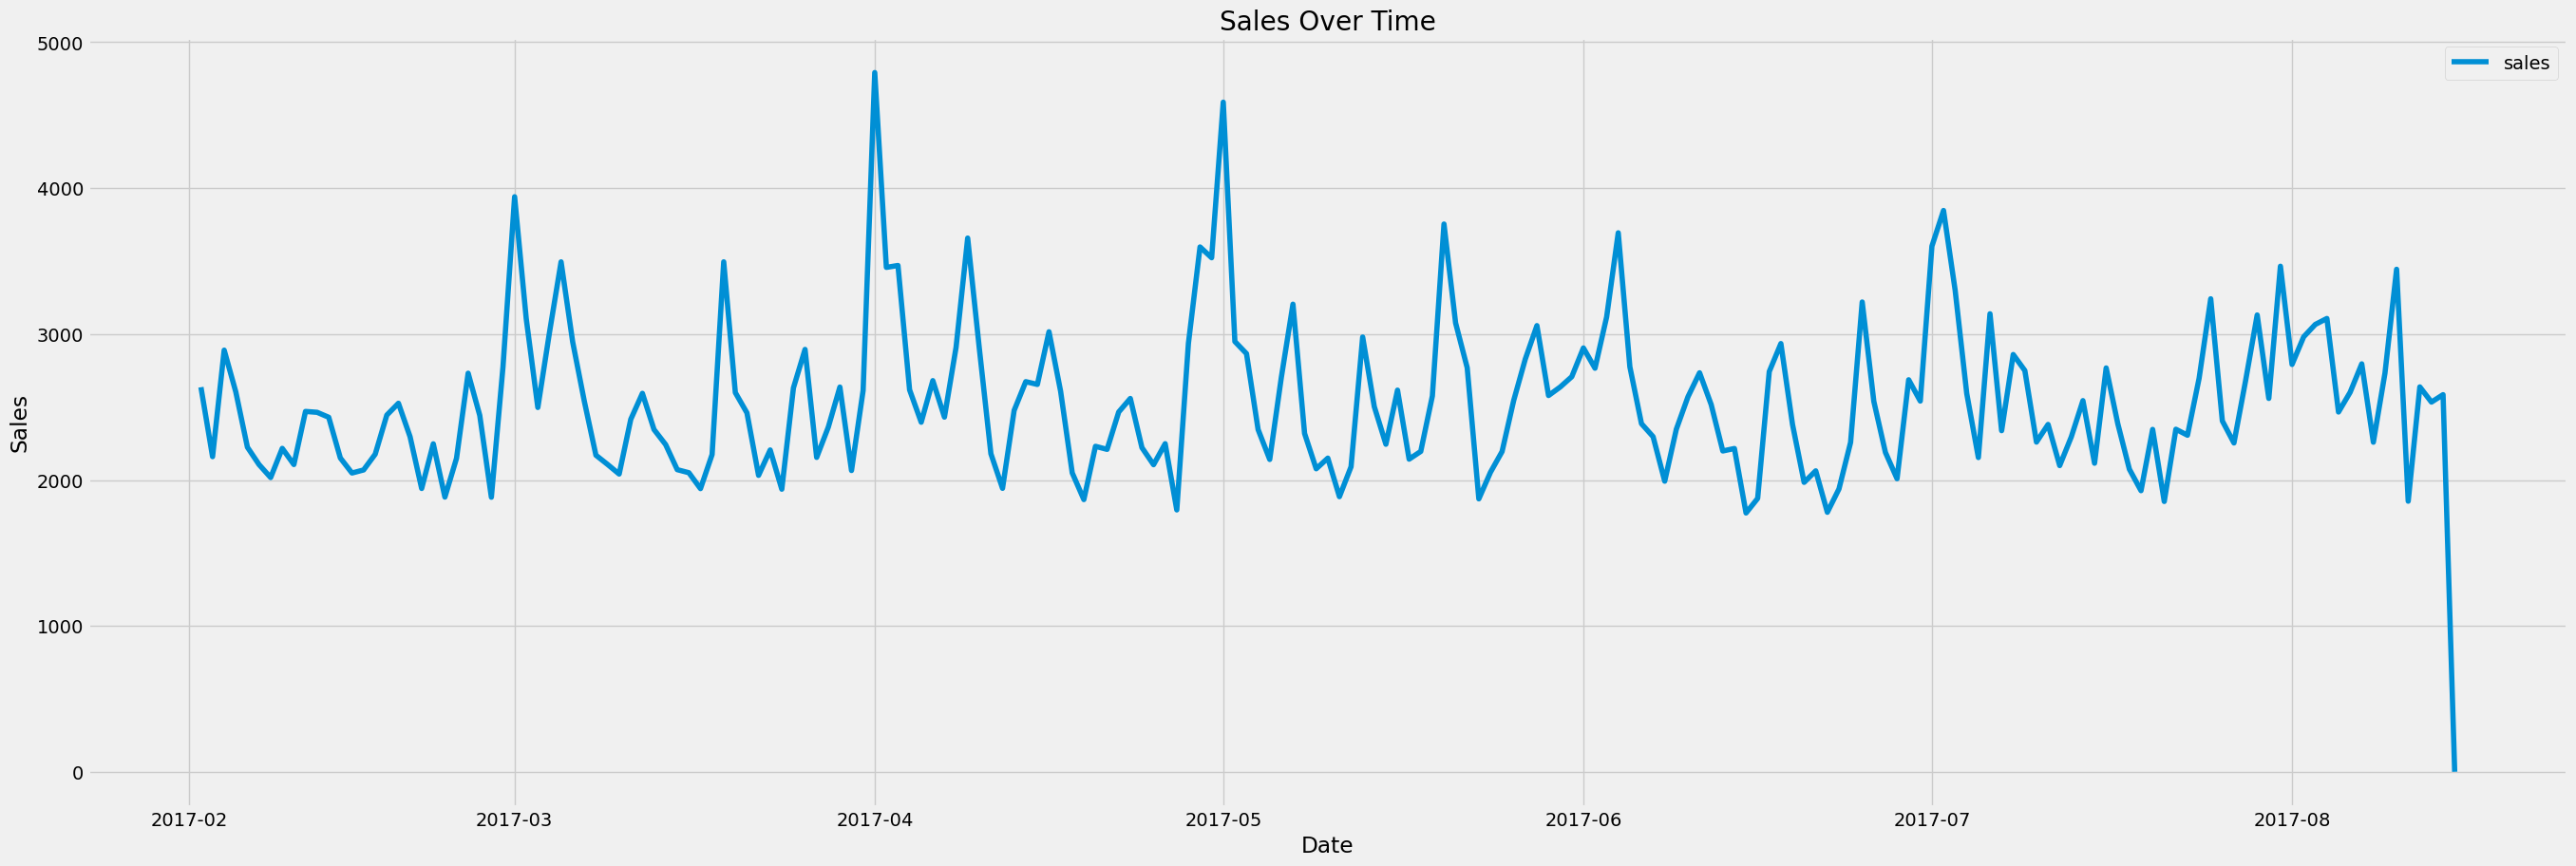

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(30, 10))

# Assuming that 'sales' is the only column in your DataFrame
sns.lineplot(data=demand_data[demand_data.index > '2017-02-01'], color='blue')

# Add labels and titles if needed
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')

plt.show()


In [255]:
forcast_Oct_MA2 = demand_data["sales"][-2:].mean()
print("Moving Average forecast with window size of 2 for October 2017 is equal to {:0.1f}.".format(forcast_Oct_MA2))

Moving Average forecast with window size of 2 for October 2017 is equal to 1293.0.


In [256]:
# Assuming df is your original DataFrame
demand_data = demand_data.loc['2017-01-31':'2017-08-15']
forcast_Oct_MA2= demand_data["sales"][-2:].mean()
print("Moving Average forecast with window size of 2 for august 2017 is equal to {:0.1f}.".format(forcast_Oct_MA2))

Moving Average forecast with window size of 2 for august 2017 is equal to 1293.0.


In [257]:
#demand_data.rename(columns={"Passengers": "Demand"}, inplace=True)

demand_data_MA = demand_data.loc['2017-01-31':'2017-08-15'] 
# below we create three new columns
demand_data_MA['MA2']  = demand_data_MA.sales.rolling(2).mean().shift() # shift is used to ensure that we use the average to forecast the next period's demand 
demand_data_MA['MA6']  = demand_data_MA.sales.rolling(6).mean().shift()
demand_data_MA['MA8'] = demand_data_MA.sales.rolling(8).mean().shift()

In [258]:
demand_data_MA.tail(45)

,sales,MA2,MA6,MA8
date,,,,
2017-07-02,3847.0,3071.5,2594.500000,2630.625
2017-07-03,3301.0,3724.5,2812.500000,2829.250
2017-07-04,2592.0,3574.0,2997.833333,2839.375
2017-07-05,2154.0,2946.5,3095.000000,2846.000
2017-07-06,3139.0,2373.0,3006.166667,2841.625
2017-07-07,2338.0,2646.5,3105.833333,2982.875
2017-07-08,2860.0,2738.5,2895.166667,2939.250
2017-07-09,2750.0,2599.0,2730.666667,2979.125
2017-07-10,2260.0,2805.0,2638.833333,2872.625


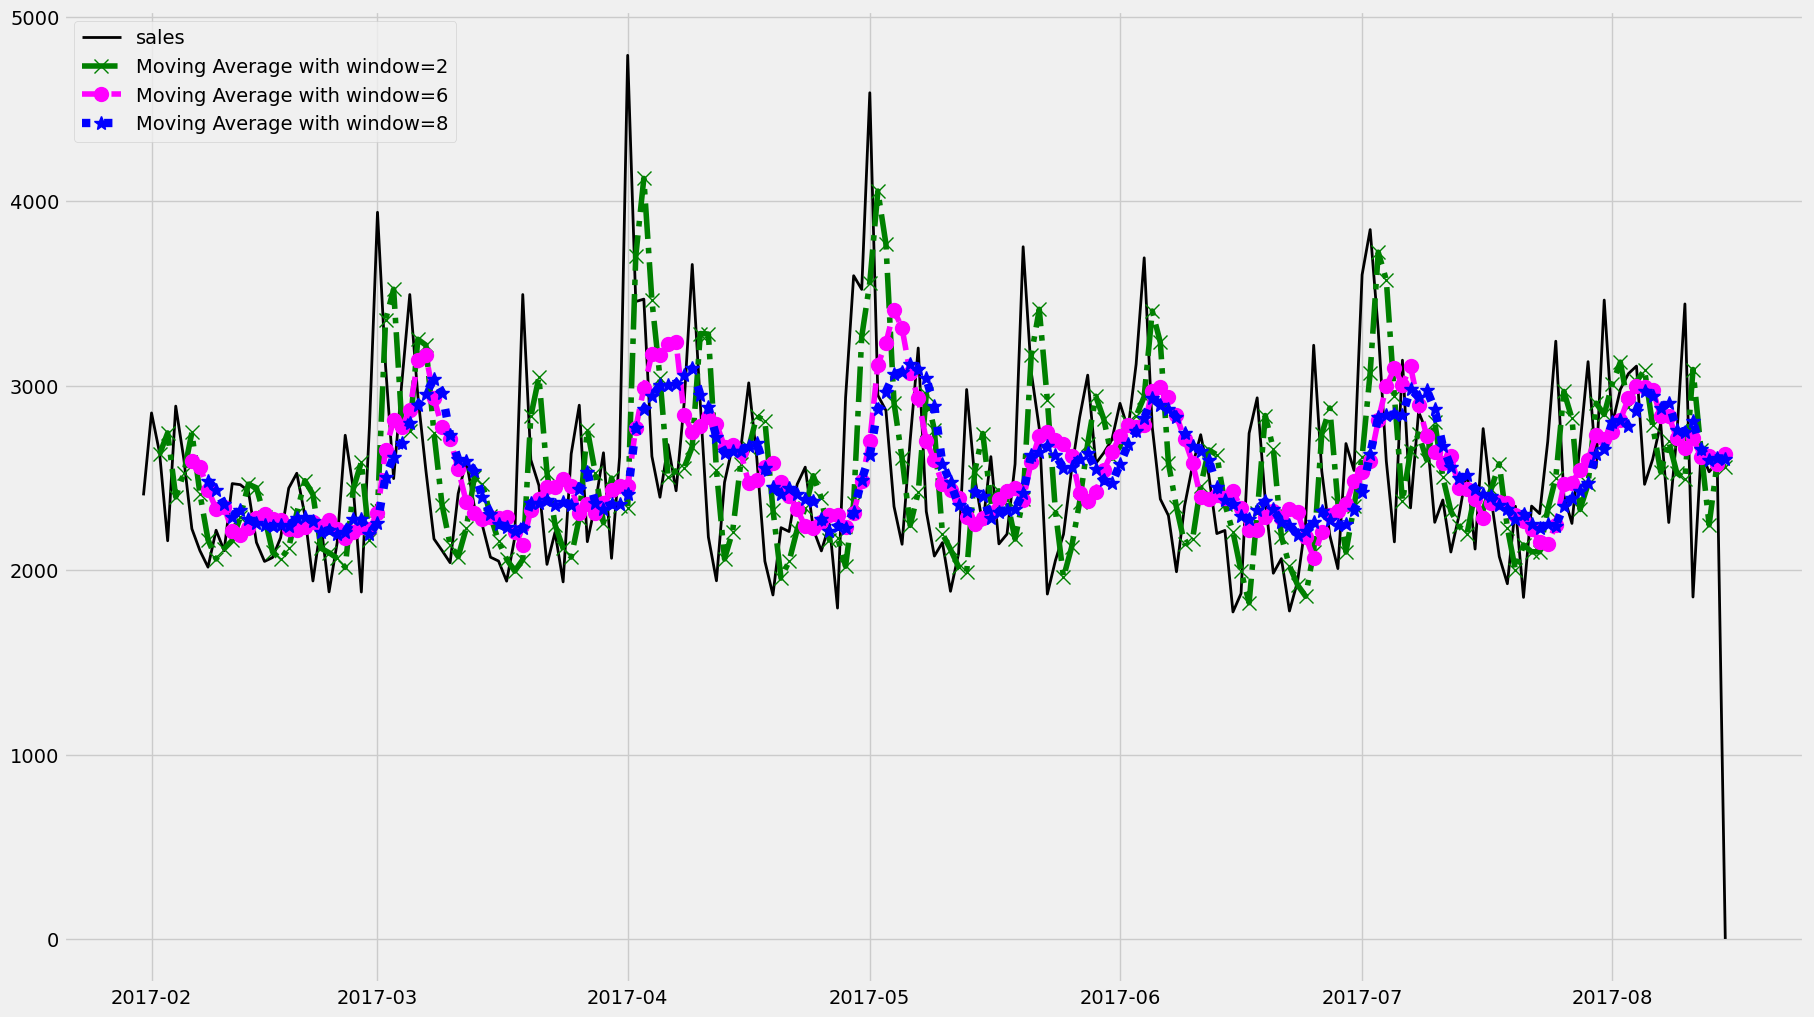

In [259]:
plt.figure(figsize=(20,12))
plt.grid(True)

plt.plot(demand_data_MA['sales'],label='sales', color='black',linewidth=2)
plt.plot(demand_data_MA['MA2'],label='Moving Average with window=2',marker='x', markersize=10, linestyle='dashdot', color='green')
plt.plot(demand_data_MA['MA6'],label='Moving Average with window=6',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.plot(demand_data_MA['MA8'],label='Moving Average with window=8',marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)

plt.legend(loc=2)
plt.show()

In [260]:
demand_data_MA

,sales,MA2,MA6,MA8
date,,,,
2017-01-31,2406.0,NaN,NaN,NaN
2017-02-01,2853.0,NaN,NaN,NaN
2017-02-02,2636.0,2629.5,NaN,NaN
2017-02-03,2160.0,2744.5,NaN,NaN
2017-02-04,2890.0,2398.0,NaN,NaN
...,...,...,...,...
2017-08-11,1855.0,3088.5,2716.500000,2809.000
2017-08-12,2638.0,2649.5,2614.666667,2657.625
2017-08-13,2534.0,2246.5,2620.833333,2599.000


In [261]:
demand_data_MA.index

DatetimeIndex(['2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-04', '2017-02-05', '2017-02-06', '2017-02-07',
               '2017-02-08', '2017-02-09',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=197, freq='D')

In [262]:
demand_data

,sales
date,
2017-01-31,2406.0
2017-02-01,2853.0
2017-02-02,2636.0
2017-02-03,2160.0
2017-02-04,2890.0
...,...
2017-08-11,1855.0
2017-08-12,2638.0
2017-08-13,2534.0


In [263]:
demand_data_MA.loc['2017-01-31':'2017-08-15']

,sales,MA2,MA6,MA8
date,,,,
2017-01-31,2406.0,NaN,NaN,NaN
2017-02-01,2853.0,NaN,NaN,NaN
2017-02-02,2636.0,2629.5,NaN,NaN
2017-02-03,2160.0,2744.5,NaN,NaN
2017-02-04,2890.0,2398.0,NaN,NaN
...,...,...,...,...
2017-08-11,1855.0,3088.5,2716.500000,2809.000
2017-08-12,2638.0,2649.5,2614.666667,2657.625
2017-08-13,2534.0,2246.5,2620.833333,2599.000


In [264]:
temp = demand_data.loc['2017-01-31':'2017-08-15'].groupby(demand_data.loc['2017-01-31':'2017-08-15'].index.month)['sales'].sum()
temp

date
1     2406.0
2    64946.0
3    77777.0
4    80676.0
5    80656.0
6    73433.0
7    80721.0
8    37858.0
Name: sales, dtype: float64

In [265]:
temp = demand_data.loc['2017-01-31':'2017-08-15'].groupby(demand_data.loc['2017-01-31':'2017-08-15'].index.month)['sales'].sum().reset_index()
sales_2017 = temp['sales']
sales_2017.rename({"sales": "Year 2017"}, inplace=True)
sales_2017= sales_2017.reset_index(drop=True)
sales_2017

0     2406.0
1    64946.0
2    77777.0
3    80676.0
4    80656.0
5    73433.0
6    80721.0
7    37858.0
Name: sales, dtype: float64

In [266]:

sales_2017 = demand_data.loc['2017-01-31':'2017-08-15']
temp = demand_data.loc['2017-01-31':'2017-08-15'].groupby(demand_data.loc['2017-01-31':'2017-08-15'].index.month)['sales'].sum().reset_index()
temp.rename(columns={"sales": "Year 2017"}, inplace=True)
sales_2017 = temp['Year 2017']
sales_2017 = sales_2017.reset_index(drop=True)



In [267]:
sales_2017

0     2406.0
1    64946.0
2    77777.0
3    80676.0
4    80656.0
5    73433.0
6    80721.0
7    37858.0
Name: Year 2017, dtype: float64

In [268]:
d = {"Month":['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug']}
dr = pd.DataFrame(data = d)

sales_table = pd.concat([dr, sales_2017],axis=1)
sales_table.set_index(["Month"], inplace=True)
sales_table

,Year 2017
Month,
Jan,2406.0
Feb,64946.0
Mar,77777.0
Apr,80676.0
May,80656.0
Jun,73433.0
Jul,80721.0
Aug,37858.0


In [269]:
sales_table["average"] = sales_table.mean(axis = 1)
average_all = average_all = sales_table[['Year 2017']].mean().mean()
sales_table["S Index"] = sales_table["average"]/average_all
sales_table

,Year 2017,average,S Index
Month,,,
Jan,2406.0,2406.0,0.038614
Feb,64946.0,64946.0,1.042319
Mar,77777.0,77777.0,1.248244
Apr,80676.0,80676.0,1.294770
May,80656.0,80656.0,1.294449
Jun,73433.0,73433.0,1.178527
Jul,80721.0,80721.0,1.295492
Aug,37858.0,37858.0,0.607584


In [270]:
print(sales_table["S Index"].sum())

8.0


In [271]:

sales_table["deseason 2017"] = sales_table["Year 2017"]/sales_table["S Index"]
sales_table

,Year 2017,average,S Index,deseason 2017
Month,,,,
Jan,2406.0,2406.0,0.038614,62309.125
Feb,64946.0,64946.0,1.042319,62309.125
Mar,77777.0,77777.0,1.248244,62309.125
Apr,80676.0,80676.0,1.294770,62309.125
May,80656.0,80656.0,1.294449,62309.125
Jun,73433.0,73433.0,1.178527,62309.125
Jul,80721.0,80721.0,1.295492,62309.125
Aug,37858.0,37858.0,0.607584,62309.125


In [272]:
sales_table.columns

Index(['Year 2017', 'average', 'S Index', 'deseason 2017'], dtype='object')

In [273]:
demand_data

,sales
date,
2017-01-31,2406.0
2017-02-01,2853.0
2017-02-02,2636.0
2017-02-03,2160.0
2017-02-04,2890.0
...,...
2017-08-11,1855.0
2017-08-12,2638.0
2017-08-13,2534.0


In [274]:
deseason_sales_data = demand_data.iloc[-45:-9, :].copy()

In [275]:
deseason_sales_data.rename(columns={"sales": "deseason_sales"}, inplace=True)

In [276]:
deseason_sales_data

,deseason_sales
date,
2017-07-02,3847.0
2017-07-03,3301.0
2017-07-04,2592.0
2017-07-05,2154.0
2017-07-06,3139.0
2017-07-07,2338.0
2017-07-08,2860.0
2017-07-09,2750.0
2017-07-10,2260.0


In [277]:
deseason_sales_data.count()

deseason_sales    36
dtype: int64

In [278]:
demand_data['2017-01-31':'2017-08-15']

,sales
date,
2017-01-31,2406.0
2017-02-01,2853.0
2017-02-02,2636.0
2017-02-03,2160.0
2017-02-04,2890.0
...,...
2017-08-11,1855.0
2017-08-12,2638.0
2017-08-13,2534.0


In [279]:

deseason_sales_data = demand_data['2017-01-31':'2017-08-15']
deseason_sales_data.rename(columns={"sales": "deseason_sales"}, inplace=True)
# Find the index where the year changes from 2012 to 2013
slicing_point_2017 = deseason_sales_data.index.get_loc('2017-01-31')

deseason_sales_data


,deseason_sales
date,
2017-01-31,2406.0
2017-02-01,2853.0
2017-02-02,2636.0
2017-02-03,2160.0
2017-02-04,2890.0
...,...
2017-08-11,1855.0
2017-08-12,2638.0
2017-08-13,2534.0


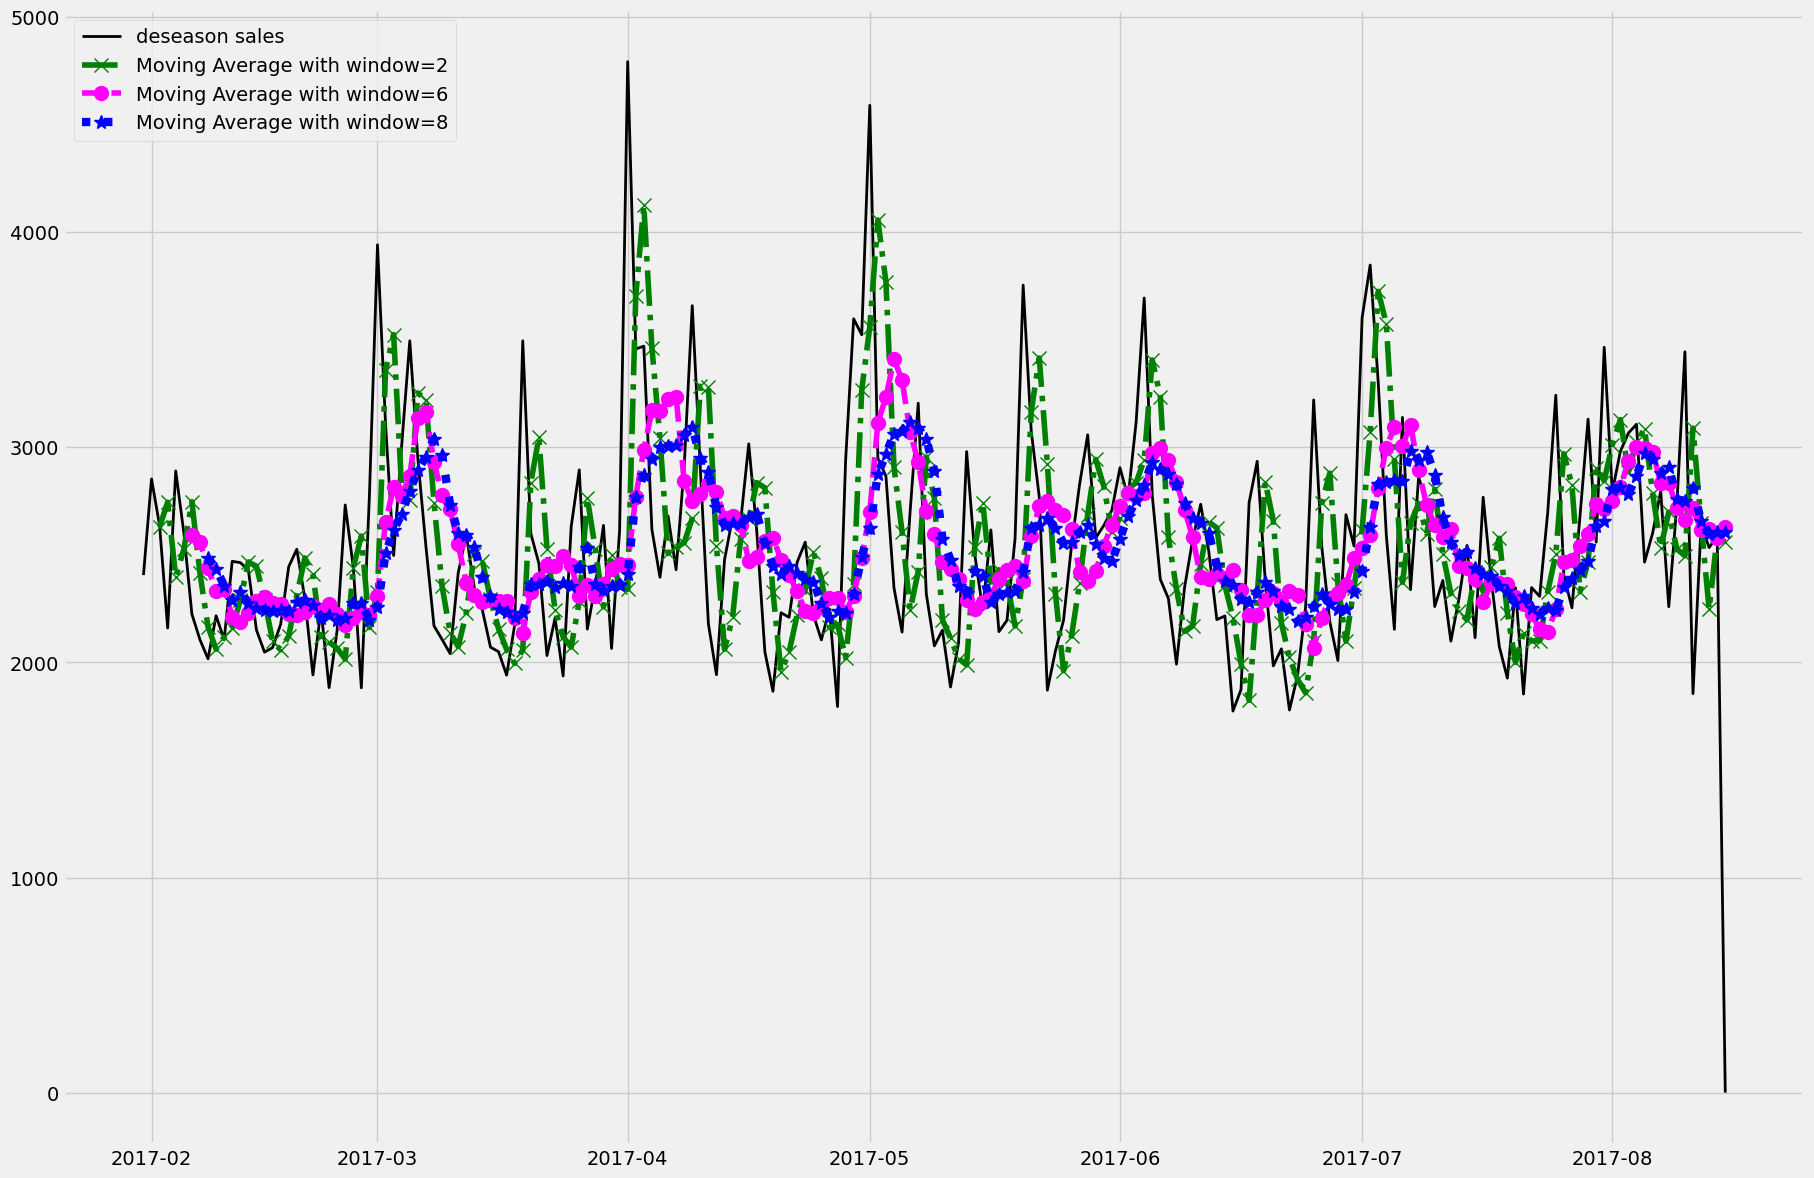

In [280]:
deseason_sales_data_MA = deseason_sales_data.copy()
deseason_sales_data_MA['MA2'] = deseason_sales_data.deseason_sales.rolling(2).mean().shift()
deseason_sales_data_MA['MA6'] = deseason_sales_data.deseason_sales.rolling(6).mean().shift()
deseason_sales_data_MA['MA8'] = deseason_sales_data.deseason_sales.rolling(8).mean().shift()

plt.figure(figsize=(20,14))
plt.grid(True)
plt.plot(deseason_sales_data_MA['deseason_sales'],label='deseason sales', color='black',linewidth=2)
plt.plot(deseason_sales_data_MA['MA2'],label='Moving Average with window=2',marker='x', markersize=10, linestyle='dashdot', color='green')
plt.plot(deseason_sales_data_MA['MA6'],label='Moving Average with window=6',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.plot(deseason_sales_data_MA['MA8'],label='Moving Average with window=8',marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)
plt.legend(loc=2)
plt.show()

In [281]:
pred = deseason_sales_data_MA.iloc[8:]

MAD_MA2 = np.mean(np.absolute(pred['deseason_sales'].values - pred['MA2'].values))
MAD_MA6 = np.mean(np.absolute(pred['deseason_sales'].values - pred['MA6'].values))
MAD_MA8 = np.mean(np.absolute(pred['deseason_sales'].values - pred['MA8'].values))

print("MAD score for Moving average with Window size 2 is {:0.1f}\nMAD score for Moving average with Window size 6 is {:0.1f}\nMAD score for Moving average with Window size 8 is {:0.1f}".format(MAD_MA2,MAD_MA6,MAD_MA8))

MAD score for Moving average with Window size 2 is 436.7
MAD score for Moving average with Window size 6 is 409.8
MAD score for Moving average with Window size 8 is 389.6


In [282]:
MA8_forecasted_deseason_sales = deseason_sales_data["deseason_sales"][-8:].mean()

MA8_forecasted_sales = demand_data.iloc[-8:,:]
MA8_forecasted_sales.rename(columns={"sales": "Forecasted sales"}, inplace=True)

a = MA8_forecasted_deseason_sales*sales_table["S Index"][0:8]
MA8_forecasted_sales["Forecasted sales"] = list(a)


MA8_forecasted_sales = MA8_forecasted_sales.reset_index()

MA8_forecasted_sales

,date,Forecasted sales
0,2017-08-08,87.117846
1,2017-08-09,2351.602502
2,2017-08-10,2816.194805
3,2017-08-11,2921.163481
4,2017-08-12,2920.439310
5,2017-08-13,2658.904729
6,2017-08-14,2922.792867
7,2017-08-15,1370.784460


In [283]:
demand_data.reset_index(inplace=True)

In [284]:
demand_data[demand_data['sales']>0]

,date,sales
0,2017-01-31,2406.0
1,2017-02-01,2853.0
2,2017-02-02,2636.0
3,2017-02-03,2160.0
4,2017-02-04,2890.0
...,...,...
192,2017-08-11,1855.0
193,2017-08-12,2638.0
194,2017-08-13,2534.0
195,2017-08-14,2585.0


In [285]:
sds=MA8_forecasted_sales[['date','Forecasted sales']]

In [286]:
sds.tail()

,date,Forecasted sales
3,2017-08-11,2921.163481
4,2017-08-12,2920.439310
5,2017-08-13,2658.904729
6,2017-08-14,2922.792867
7,2017-08-15,1370.784460


In [287]:
demand_data['date'] = pd.to_datetime(demand_data['date'], format='%Y-%m-%d')
sds['date'] = pd.to_datetime(sds['date'], format='%Y-%m-%d')


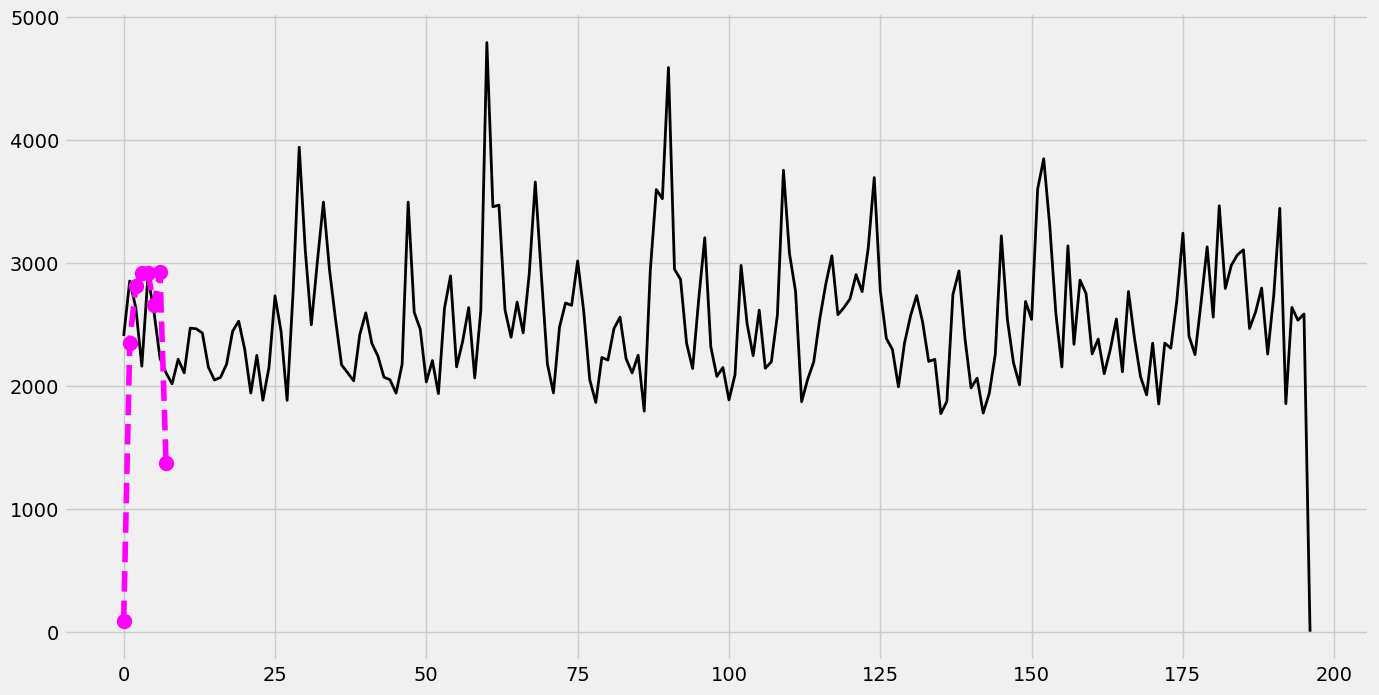

In [288]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(demand_data['sales'],label='sales', color='black',linewidth=2)
plt.plot(sds["Forecasted sales"],label='Forecasted sales using MA8',marker='o', markersize=10, linestyle='dashed', color='magenta')
#plt.legend(loc=2)
plt.show()

In [289]:

dfq=demand_data[:]

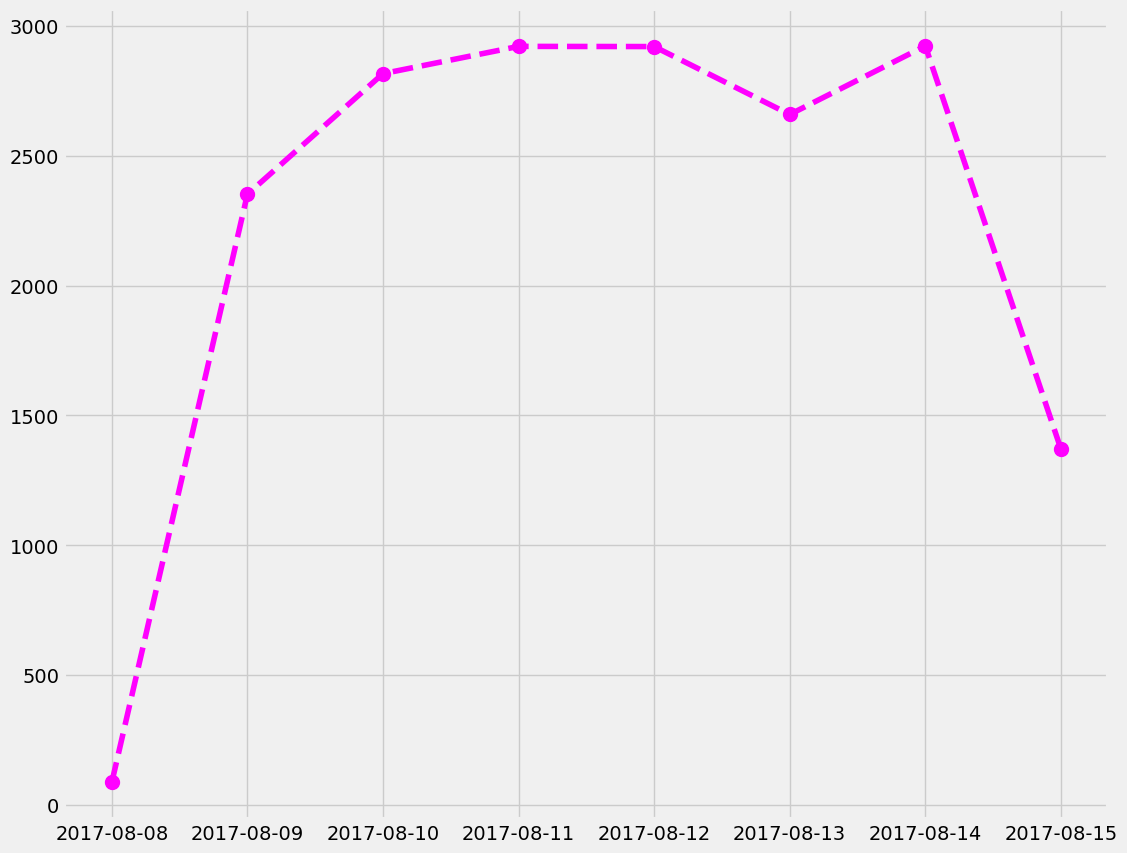

In [290]:
plt.plot(sds['date'],sds["Forecasted sales"],label='Forecasted sales using MA8',marker='o', markersize=10, linestyle='dashed', color='magenta')


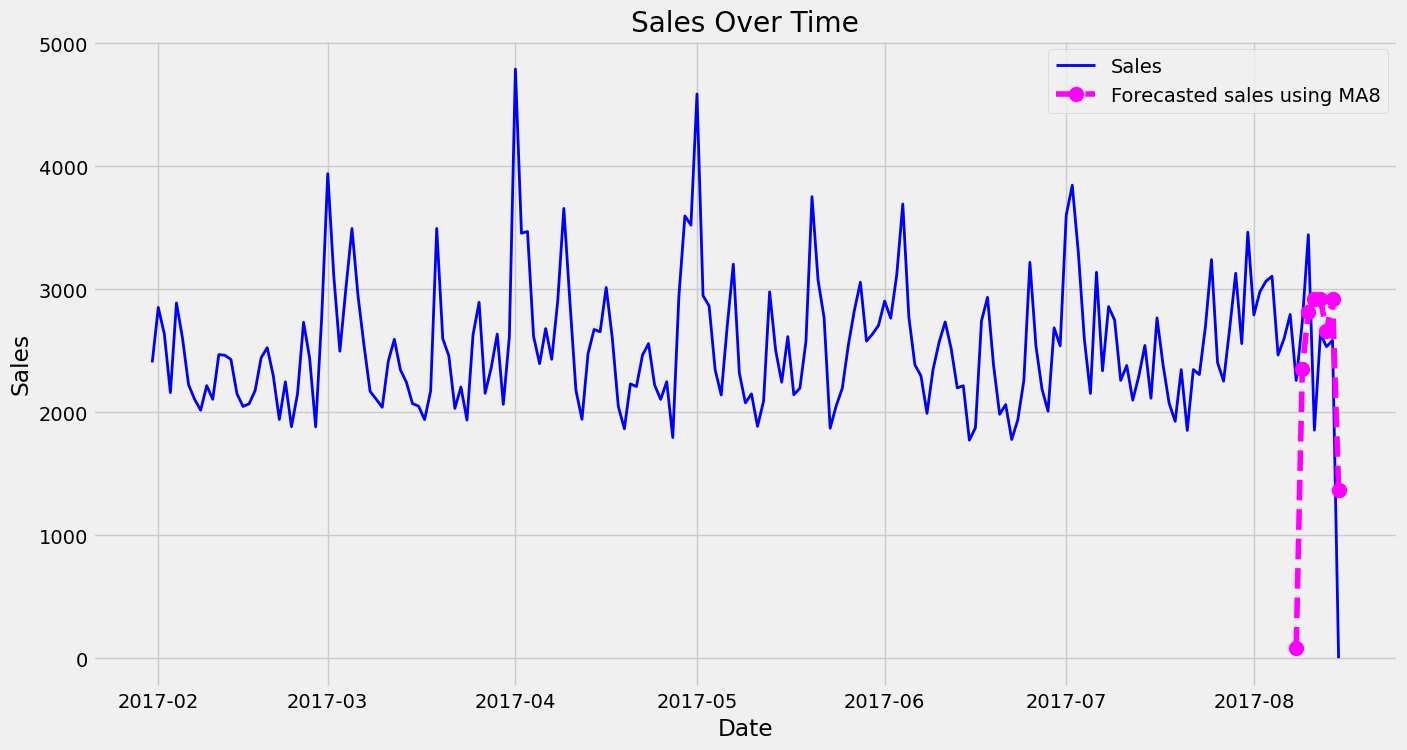

In [291]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(15, 8))
plt.grid(True)
#dfq=demand_data[]
plt.plot(dfq['date'], dfq['sales'], label='Sales', color='blue', linewidth=2)
#plt.plot(sds['date'],sds["Forecasted sales"],label='Forecasted sales using MA8',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.plot(sds['date'],sds["Forecasted sales"],label='Forecasted sales using MA8',marker='o', markersize=10, linestyle='dashed', color='magenta')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.show()


In [292]:
MAD_MA8 = np.mean(np.absolute(MA8_forecasted_sales["Forecasted sales"].values - demand_data['sales'][-8:].values))
MAD_MA8

795.2712117807786

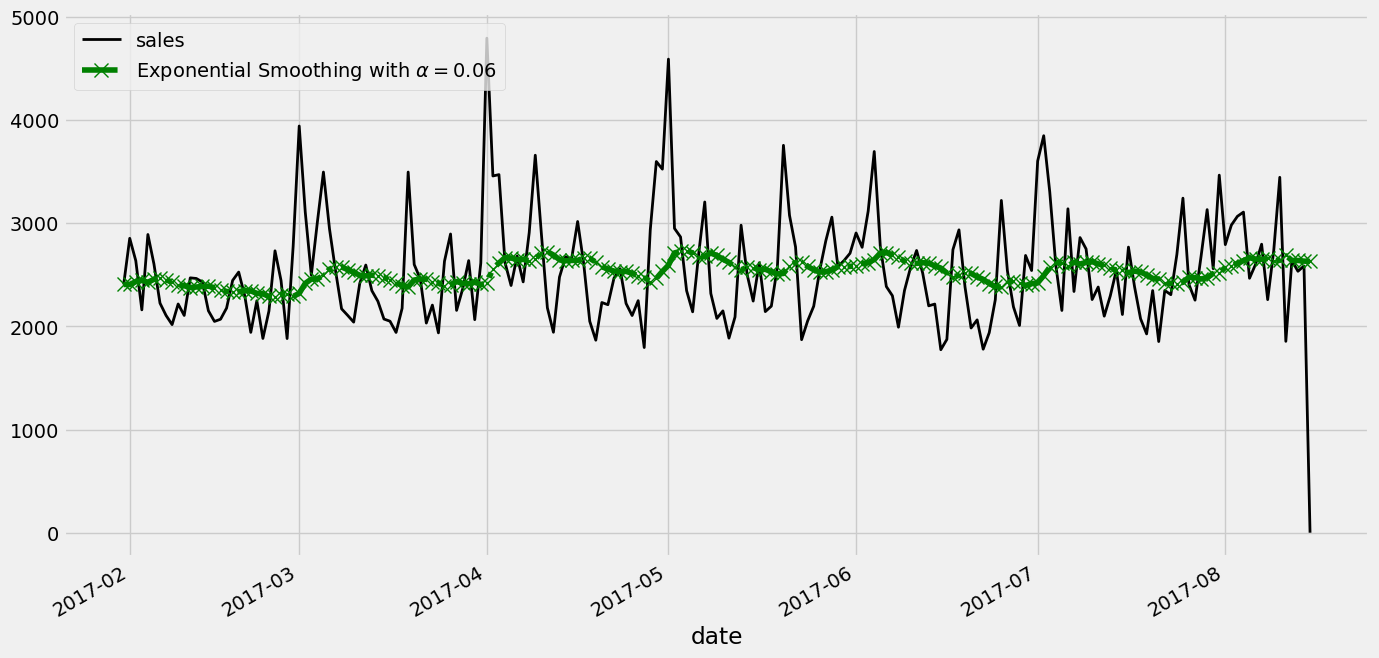

In [293]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.api import SimpleExpSmoothing

# Modify your data (assuming you have done the necessary data formatting)
demand_data['date'] = pd.to_datetime(demand_data['date'])
demand_data.set_index('date', inplace=True)
demand_data['sales'] = pd.to_numeric(demand_data['sales'])

plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(demand_data, label='sales', color='black', linewidth=2)

ES1 = SimpleExpSmoothing(demand_data['sales']).fit(smoothing_level=0.06, optimized=False)
ES1.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=%s$' % 0.06, marker='x', markersize=10, linestyle='dashdot', color='green')

# Repeat the above lines for ES2 and ES3 with different smoothing levels

plt.legend(loc=2)
plt.show()


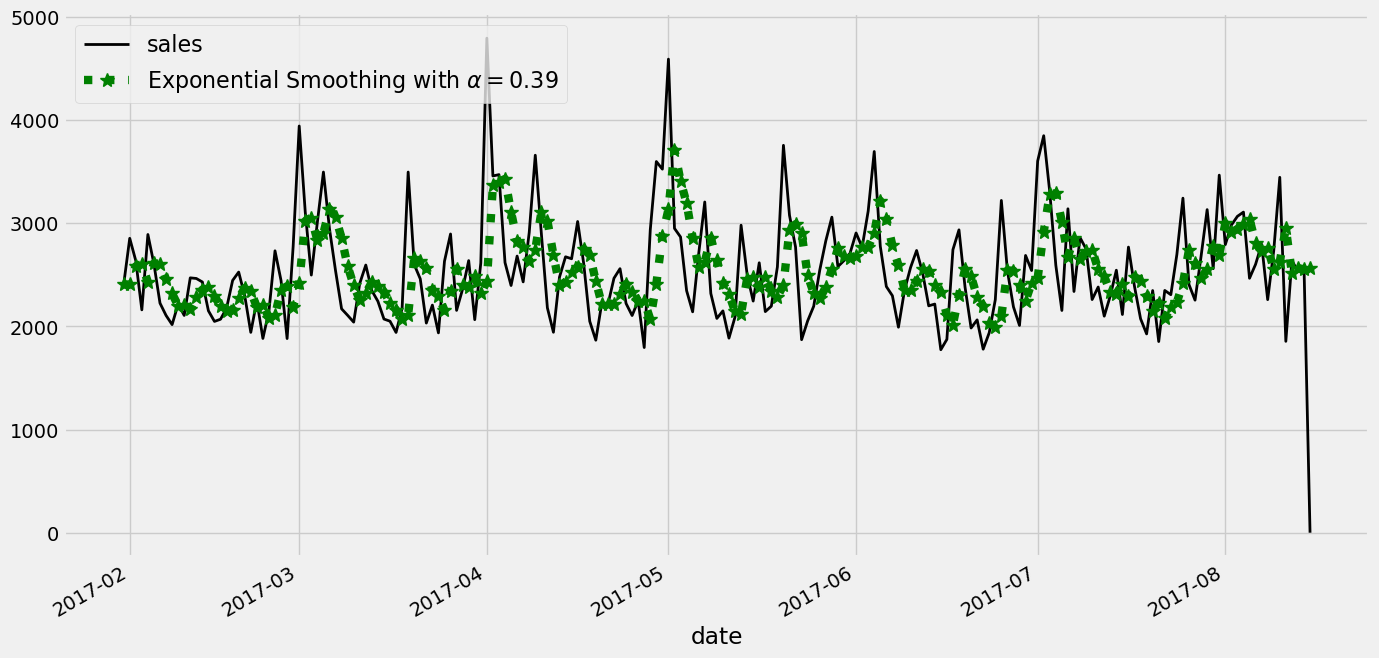

In [294]:
plt.figure(figsize=(15,8))
plt.grid(True)

from statsmodels.tsa.api import  SimpleExpSmoothing

plt.plot(deseason_sales_data,label='sales', color='black',linewidth=2)


ES_best = SimpleExpSmoothing(deseason_sales_data).fit() # by default, python will find the best alpha!
best_alpha = ES_best.model.params['smoothing_level']

ES_best.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=${:0.2f}'.format(best_alpha), 
                          marker='*', markersize=10, linestyle='dotted', color='green',linewidth=6)

plt.legend(loc=2,prop={'size': 16})


plt.show()

In [295]:
ES_forecasted_sales = demand_data.iloc[-8:,:]
ES_forecasted_sales.rename(columns={"sales": "Forecasted sales"}, inplace=True)


ES_forecasted_deseason_sales = ES_best.forecast()

b = ES_forecasted_deseason_sales.values[0]*sales_table["S Index"][0:8]
ES_forecasted_sales["Forecasted sales"] = list(b)

ES_forecasted_sales

,Forecasted sales
date,
2017-08-08,60.009540
2017-08-09,1619.858502
2017-08-10,1939.884438
2017-08-11,2012.190197
2017-08-12,2011.691365
2017-08-13,1831.538038
2017-08-14,2013.312570
2017-08-15,944.239879


In [296]:
demand_data.tail()

,sales
date,
2017-08-11,1855.0
2017-08-12,2638.0
2017-08-13,2534.0
2017-08-14,2585.0
2017-08-15,1.0


In [297]:
wer=demand_data[:]

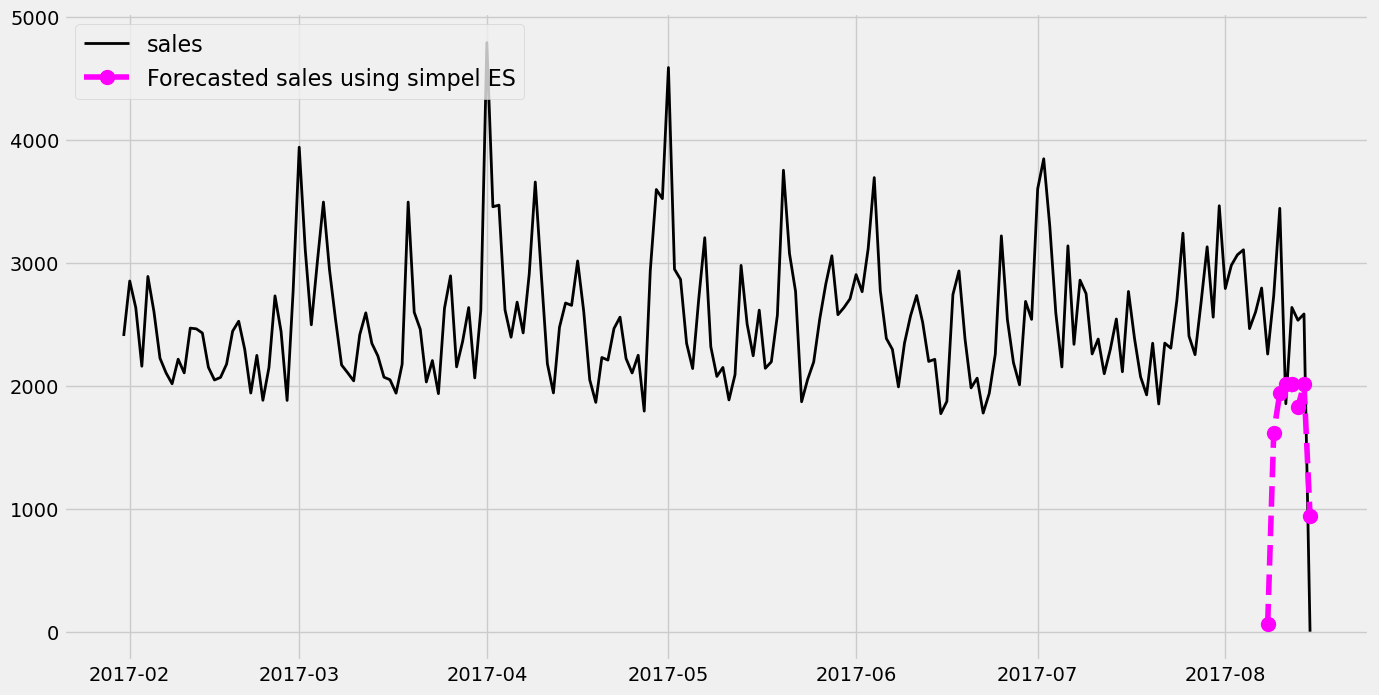

In [298]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(wer['sales'],label='sales', color='black',linewidth=2)
plt.plot(ES_forecasted_sales["Forecasted sales"],label='Forecasted sales using simpel ES',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.legend(loc=2,prop={'size': 16})
plt.show()

In [299]:
MAD_ES = np.mean(np.absolute(ES_forecasted_sales["Forecasted sales"].values - demand_data['sales'][-8:].values))
round(MAD_ES,2)

977.14

In [300]:
deseason_sales_data

,deseason_sales
date,
2017-01-31,2406.0
2017-02-01,2853.0
2017-02-02,2636.0
2017-02-03,2160.0
2017-02-04,2890.0
...,...
2017-08-11,1855.0
2017-08-12,2638.0
2017-08-13,2534.0


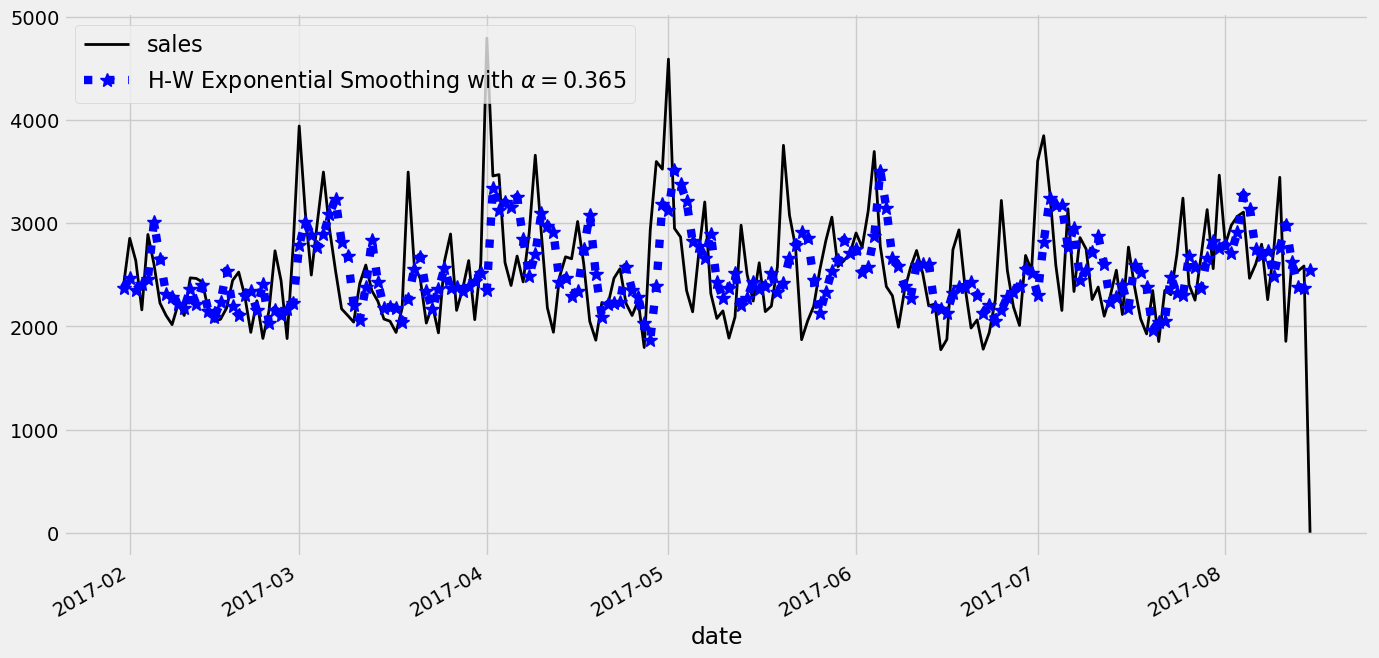

In [301]:
plt.figure(figsize=(15,8))
plt.grid(True)

train_data = demand_data.iloc[:,:]
# train_data.drop('index',axis=1,inplace=True)
plt.plot(train_data,label='sales', color='black',linewidth=2)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

#H_W_model = ExponentialSmoothing(train_data.astype(np.float), trend="add", seasonal="add", seasonal_periods=12)
H_W_model = ExponentialSmoothing(train_data.astype(float), trend="add", seasonal="add", seasonal_periods=12)

H_W_fit = H_W_model.fit()

best_H_W_alpha = H_W_fit.model.params['smoothing_level']

H_W_fit.fittedvalues.plot(label=r'H-W Exponential Smoothing with $\alpha=%0.3f$'%best_H_W_alpha,
                          marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)
plt.legend(loc=2,prop={'size': 16})


plt.show()

In [302]:
demand_data.iloc[-9:, :]

,sales
date,
2017-08-07,2796.0
2017-08-08,2259.0
2017-08-09,2733.0
2017-08-10,3444.0
2017-08-11,1855.0
2017-08-12,2638.0
2017-08-13,2534.0
2017-08-14,2585.0
2017-08-15,1.0


In [303]:
HES_forecasted_sales = demand_data.iloc[-9:,:]
# HES_forecasted_sales.rename({"sales": "Forecasted sales"}, inplace=True)


HES_forecasted_deseason_sales = H_W_fit.forecast(9)

HES_forecasted_deseason_sales

2017-08-16    1908.569174
2017-08-17    1811.493387
2017-08-18    1683.816339
2017-08-19    1686.444941
2017-08-20    1662.380406
2017-08-21    1614.844077
2017-08-22    1805.616678
2017-08-23    1720.610525
2017-08-24    1807.096483
Freq: D, dtype: float64

In [304]:

HES_forecasted_sales['sales']

date
2017-08-07    2796.0
2017-08-08    2259.0
2017-08-09    2733.0
2017-08-10    3444.0
2017-08-11    1855.0
2017-08-12    2638.0
2017-08-13    2534.0
2017-08-14    2585.0
2017-08-15       1.0
Name: sales, dtype: float64

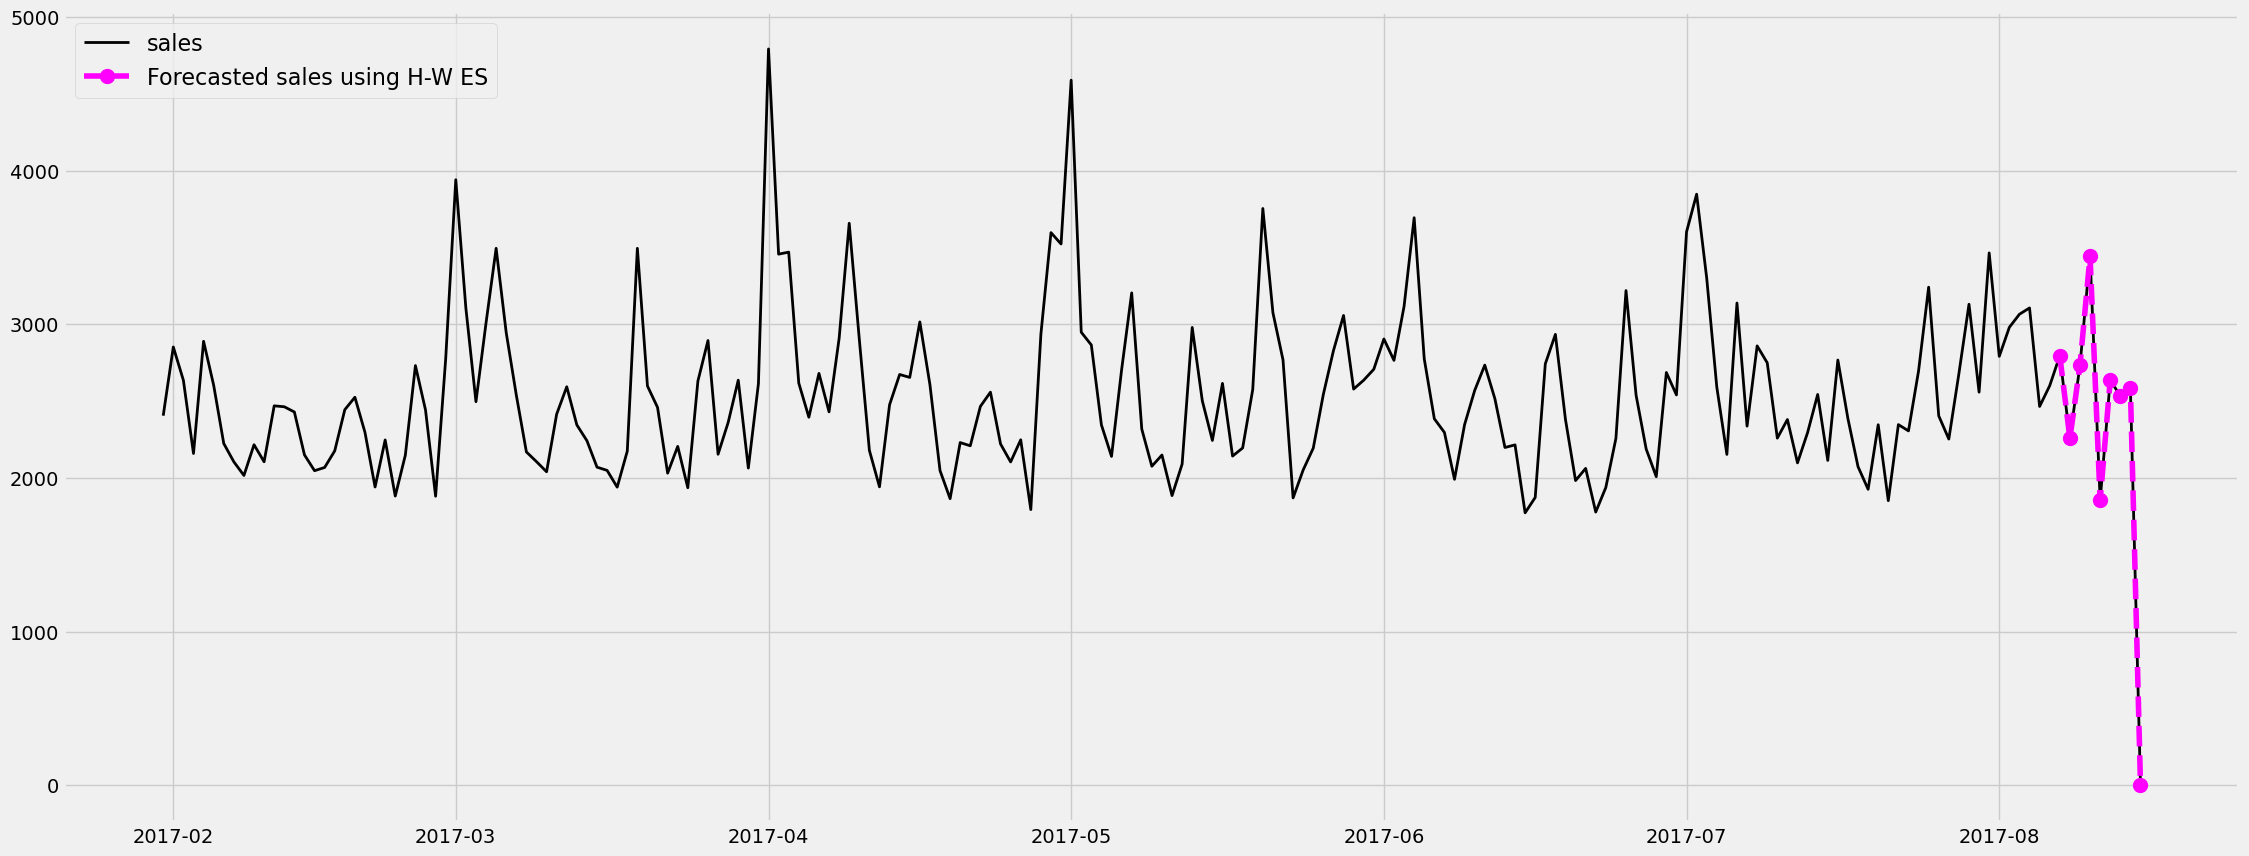

In [305]:
plt.figure(figsize=(25,10))
plt.grid(True)
plt.plot(demand_data['sales'], label='sales', color='black',linewidth=2)
plt.plot(HES_forecasted_sales["sales"],label='Forecasted sales using H-W ES',
         marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.legend(loc=2,prop={'size': 16})
plt.show()

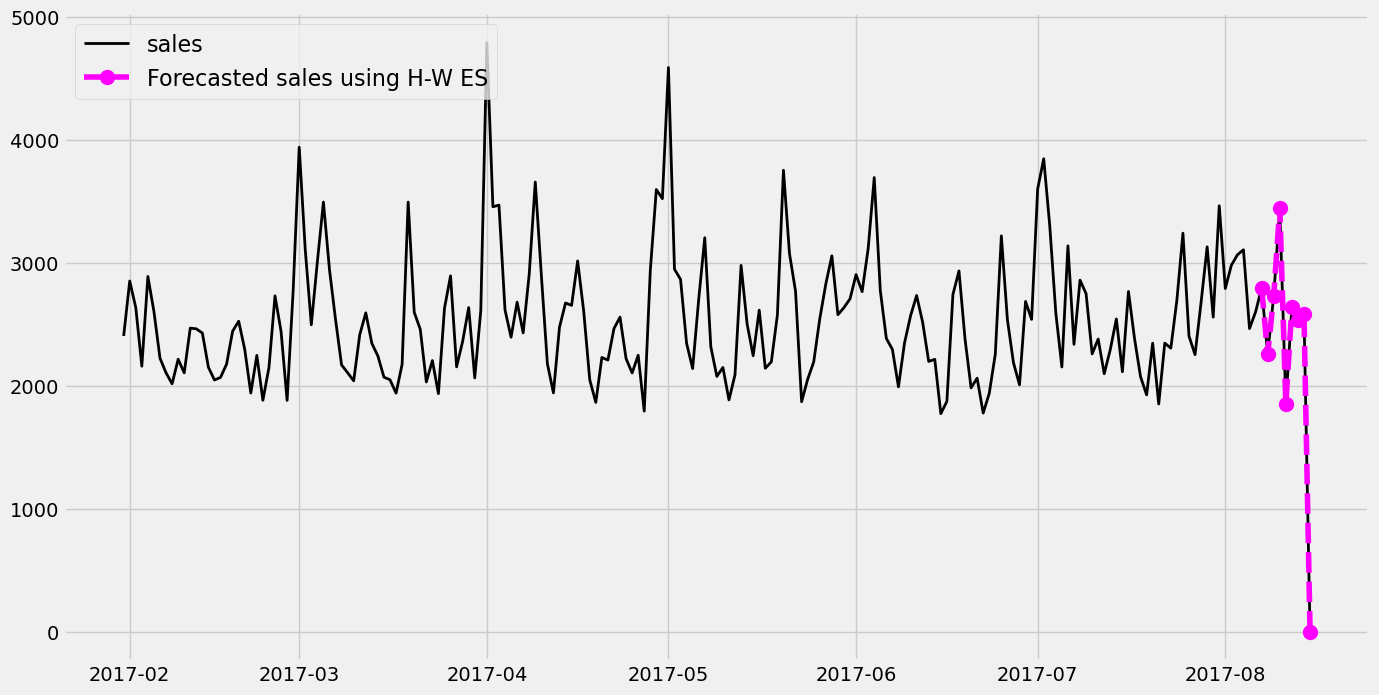

In [306]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(wer['sales'], label='sales', color='black',linewidth=2)
plt.plot(HES_forecasted_sales["sales"],label='Forecasted sales using H-W ES',
         marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.legend(loc=2,prop={'size': 16})
plt.show()

In [307]:
MAD_HES = np.mean(np.absolute(HES_forecasted_deseason_sales.values - demand_data['sales'][-9:].values))
round(MAD_HES,2)

972.92

In [308]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# # Assuming 'sales' is the name of the column containing sales data in your DataFrame.
# train_final = demand_data['sales'].iloc[-9:]

# # Now you can create the SimpleExpSmoothing model
# model_final = ExponentialSmoothing(train_final.astype(float), trend = 'add', seasonal = 'add')

# fit_final = model_final.fit()
# forecast = round(fit_final.forecast(3), 1)

